# Dataset

El dataset adquirido se descargó de Kaggle: [CREMA-D](https://www.kaggle.com/datasets/ejlok1/cremad)





In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib
import librosa

In [70]:
def get_correct_path(filename):
    if len(filename) < 4 or not filename[2:4].isdigit():
        print(f"Nombre de archivo inválido: {filename}")
        return None 
    
    author_id = int(filename[2:4])
    author_folder = f"Author_{author_id}"
    correct_path = f"{base_dir}{author_folder}/{filename}"
    return correct_path

def make_csv(base_directory: str, output_csv="dataset.csv"):
    """
    Create a CSV file from audio dataset directories, extracting emotion and intensity information.
    
    Args:
        base_directory (str): Base directory containing the author subdirectories with audio files.
        output_csv (str): Name of the output CSV file.
    """
    data = []
    
    emotion_labels = {
        "ANG": 1, "DIS": 2, "FEA": 3, "HAP": 4, "NEU": 5, "SAD": 6
    }
    
    for author_folder in os.listdir(base_directory): 
        author_path = os.path.join(base_directory, author_folder)
        if os.path.isdir(author_path):
            for filename in os.listdir(author_path): 
                if filename.endswith(".wav"):
                    parts = filename.split("_") 
                    if len(parts) >= 3:
                        actor_id = parts[0]
                        emotion_code = parts[2] 
                        
                        emotion_id = emotion_labels.get(emotion_code, -1)
                        print(f"Processing file: {filename}, Emotion code: {emotion_code}, Mapped ID: {emotion_id}")
                        
                        data.append({
                            "filename": filename,
                            "author": author_folder,
                            "emotion_id": emotion_id
                        })
    
    if data:
        df = pd.DataFrame(data)
        df.to_csv(output_csv, index=False)
        print(f"CSV creado exitosamente: {output_csv}")
    else:
        print("No se encontraron archivos de audio en las carpetas especificadas.")

def average_audio_duration(directories: list[str]):
    for directory in directories:
        dir_path = Path(directory)
        
        if not dir_path.exists() or not dir_path.is_dir():
            print(f"Directory not found: {directory}")
            continue
        
        durations = []
        
        for file in dir_path.iterdir():
            if file.suffix == ".wav":
                try:
                    y, sr = librosa.load(file, sr=None)  # Cargar el audio sin cambiar la frecuencia de muestreo
                    duration = librosa.get_duration(y=y, sr=sr)  # Obtener la duración en segundos
                    durations.append(duration)
                except Exception as e:
                    print(f"Error processing {file.name}: {e}")

        if durations:
            avg_duration = sum(durations) / len(durations)
            print(f"{directory}: {len(durations)} archivos. Duración promedio: {avg_duration:.2f} segundos")
        else:
            print(f"{directory}: No se encontraron archivos de audio.")

In [ ]:
directories = [f'./archive/AudioWAV/Author_{i:d}' for i in range(1, 92)]
average_audio_duration(directories)


In [ ]:
directories = "./archive/AudioWAV/"
make_csv(directories, "crema_dataset.csv")

In [21]:
data = pd.read_csv("crema_dataset.csv")

In [22]:
data.head()

,filename,author,emotion_id
0,1001_DFA_ANG_XX.wav,Author_1,1
1,1001_DFA_DIS_XX.wav,Author_1,2
2,1001_DFA_FEA_XX.wav,Author_1,3
3,1001_DFA_HAP_XX.wav,Author_1,4
4,1001_DFA_NEU_XX.wav,Author_1,5


In [23]:
unique_emotions = data["emotion_id"].unique()
print(unique_emotions)

[1 2 3 4 5 6]


Se comprueba que solo existen 6 emociones diferentes en el dataset.

In [ ]:
emotion_labels = {
    1: "ANG", 2: "DIS", 3: "FEA", 4: "HAP", 5: "NEU", 6: "SAD"
}

emotion_counts = data["emotion_id"].value_counts().sort_index()

emotion_names = [emotion_labels[eid] for eid in emotion_counts.index]

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=emotion_names, y=emotion_counts.values, palette="coolwarm")

plt.xlabel("Emotion", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.title("Distribution of Emotions in Dataset", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Análisis de espectogramas

In [73]:
import random

df_angry = data[data["emotion_id"] == 1]  # ANG
df_disgust = data[data["emotion_id"] == 2]  # DIS
df_fear = data[data["emotion_id"] == 3]  # FEA
df_happy = data[data["emotion_id"] == 4]  # HAP
df_neutral = data[data["emotion_id"] == 5]  # NEU
df_sad = data[data["emotion_id"] == 6]  # SAD

def get_random_samples(df, k=4):
    return random.sample(df["filename"].tolist(), k) if len(df) >= k else df["filename"].tolist()

angry_random_ids = get_random_samples(df_angry)
disgust_random_ids = get_random_samples(df_disgust)
fear_random_ids = get_random_samples(df_fear)
happy_random_ids = get_random_samples(df_happy)
neutral_random_ids = get_random_samples(df_neutral)
sad_random_ids = get_random_samples(df_sad)

print("ANG:", angry_random_ids)
print("DIS:", disgust_random_ids)
print("FEA:", fear_random_ids)
print("HAP:", happy_random_ids)
print("NEU:", neutral_random_ids)
print("SAD:", sad_random_ids)

ANG: ['1062_TAI_ANG_XX.wav', '1077_IWL_ANG_XX.wav', '1060_IWL_ANG_XX.wav', '1014_WSI_ANG_XX.wav']
DIS: ['1019_DFA_DIS_XX.wav', '1067_ITS_DIS_XX.wav', '1022_ITS_DIS_XX.wav', '1042_ITS_DIS_XX.wav']
FEA: ['1002_IEO_FEA_LO.wav', '1063_IOM_FEA_XX.wav', '1068_IWL_FEA_XX.wav', '1087_MTI_FEA_XX.wav']
HAP: ['1064_IWW_HAP_XX.wav', '1074_ITS_HAP_XX.wav', '1083_TIE_HAP_XX.wav', '1054_IWL_HAP_XX.wav']
NEU: ['1089_ITS_NEU_XX.wav', '1052_IEO_NEU_XX.wav', '1010_WSI_NEU_XX.wav', '1018_TSI_NEU_XX.wav']
SAD: ['1050_IEO_SAD_LO.wav', '1010_IEO_SAD_MD.wav', '1082_DFA_SAD_XX.wav', '1013_ITS_SAD_XX.wav']


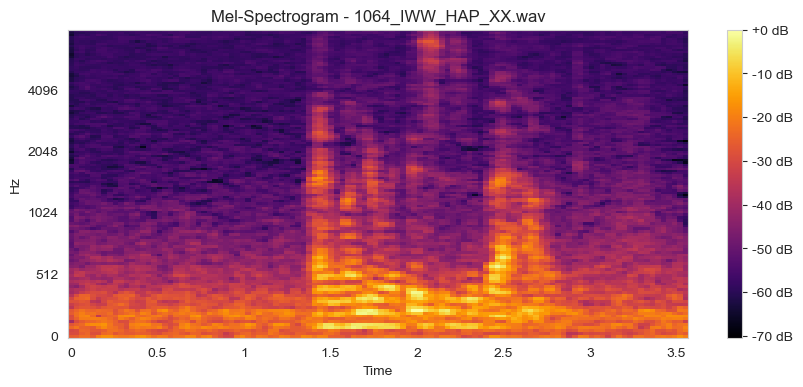

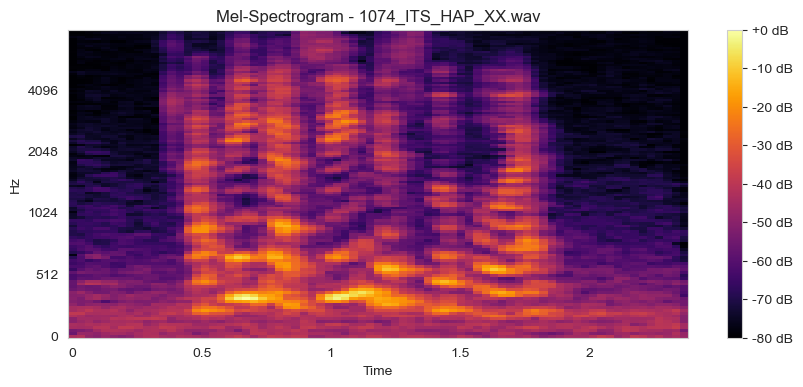

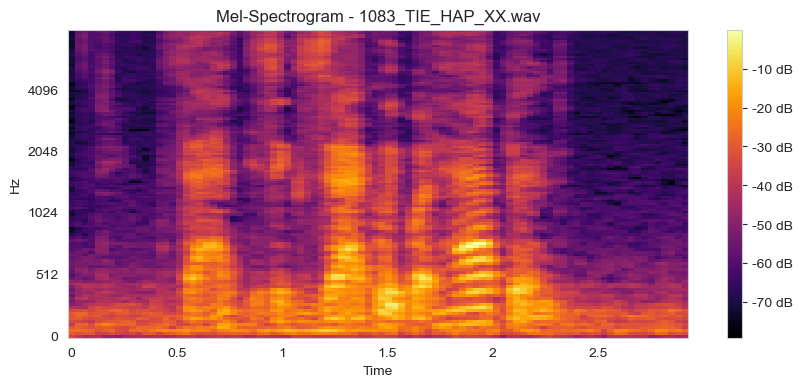

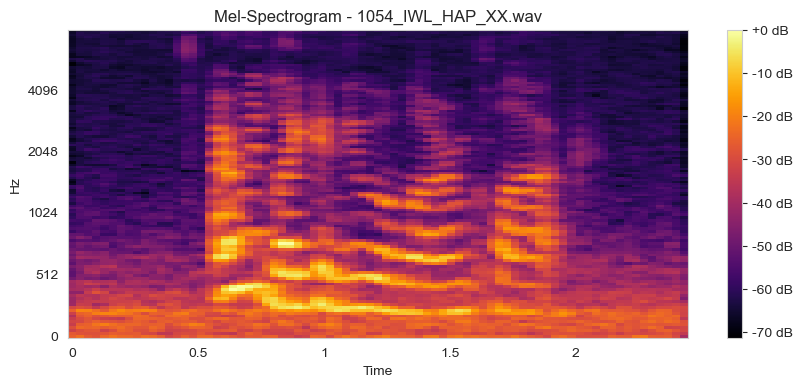

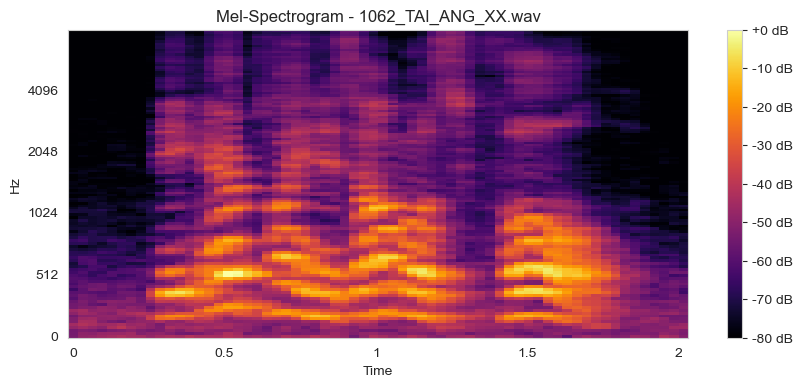

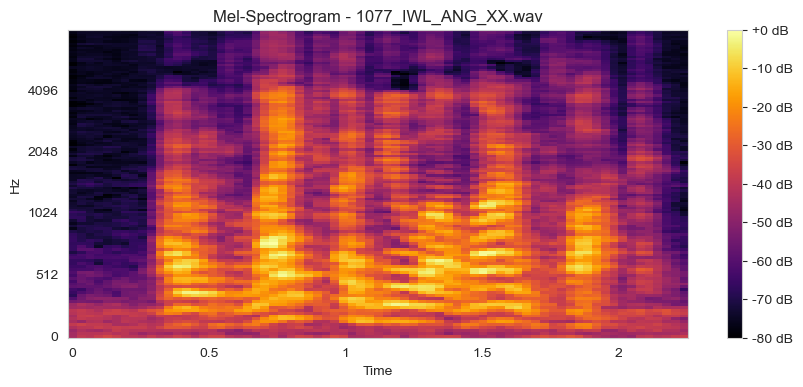

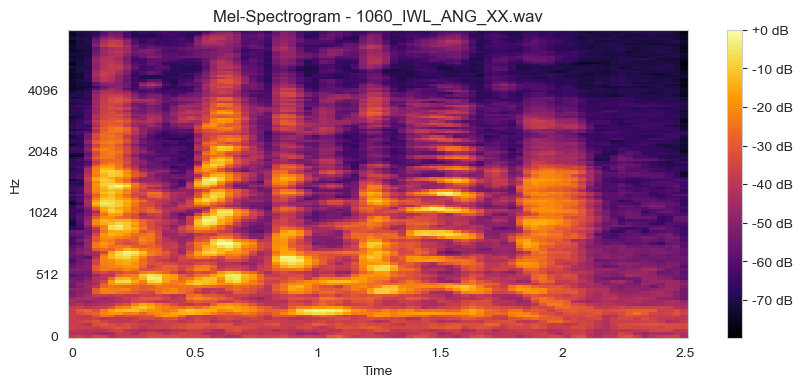

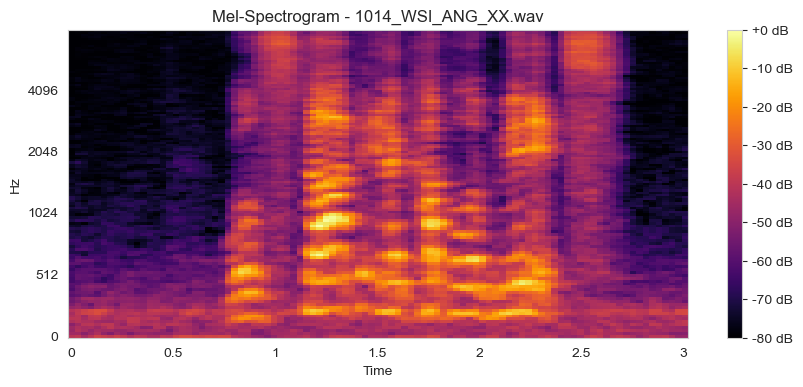

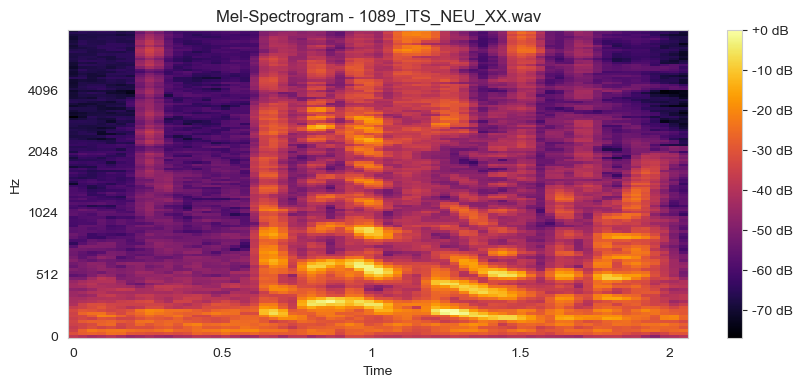

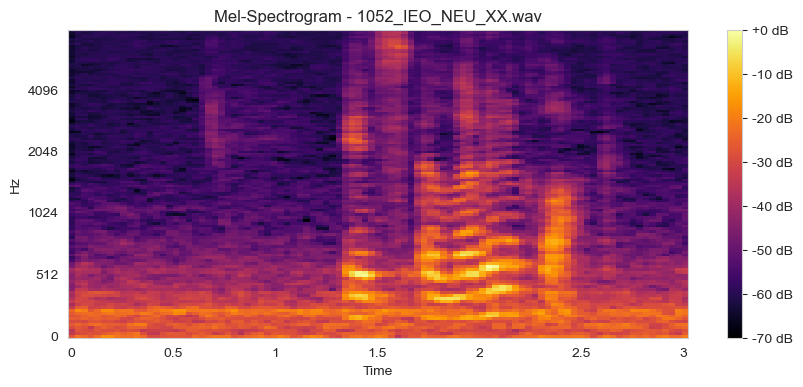

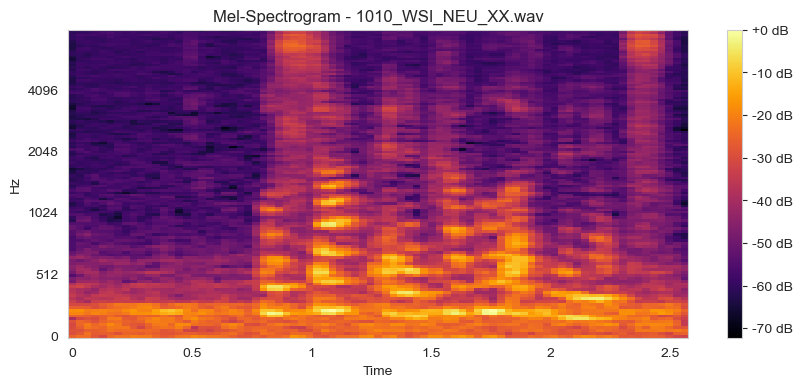

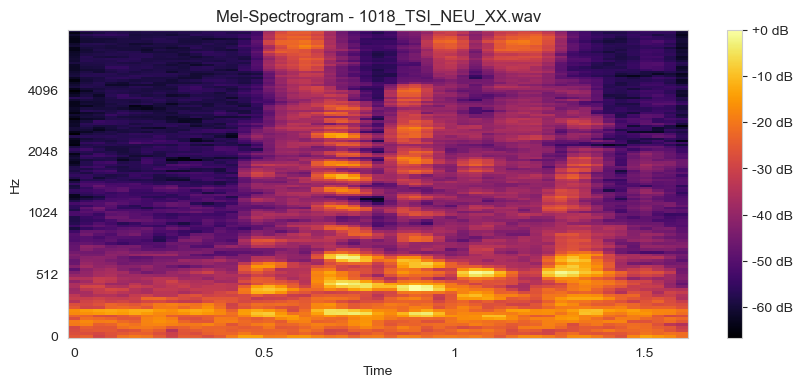

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def plot_mel_spectrogram(audio_path):
    if not os.path.exists(audio_path):
        print(f"Archivo no encontrado: {audio_path}")
        return
    
    y, sr = librosa.load(audio_path, sr=None)

    # Calcular el espectrograma de Mel
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="mel", cmap="inferno")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Mel-Spectrogram - {os.path.basename(audio_path)}")
    plt.show()

angry_random_ids = [get_correct_path(f) for f in angry_random_ids if get_correct_path(f) is not None]
disgust_random_ids = [get_correct_path(f) for f in disgust_random_ids if get_correct_path(f) is not None]
fear_random_ids = [get_correct_path(f) for f in fear_random_ids if get_correct_path(f) is not None]
happy_random_ids = [get_correct_path(f) for f in happy_random_ids if get_correct_path(f) is not None]
neutral_random_ids = [get_correct_path(f) for f in neutral_random_ids if get_correct_path(f) is not None]
sad_random_ids = [get_correct_path(f) for f in sad_random_ids if get_correct_path(f) is not None]

# estoy graficando el espectograma de las muestras seleccionadas (angry especificamente)

for audio_file in happy_random_ids + angry_random_ids + neutral_random_ids:
    plot_mel_spectrogram(audio_file)